# NB for the blog post to analyze the Supply Chain data for a fictitious automotive company

In this file we will:

+ Create dummy data for a car manufacturer along with its subsidiaries
+ Create relationships among the various nodes
+ Analyze the data for few use cases

Below image shows provides a high-level overview of how the various components of this fictitious car manufacturing company are related amongst each other. This provides an overview how the supplier organization/subsidiaries are related with the company, what are the locations where the factories and warehouses are operating. What are the various products required to build the car and how they are related with the demand

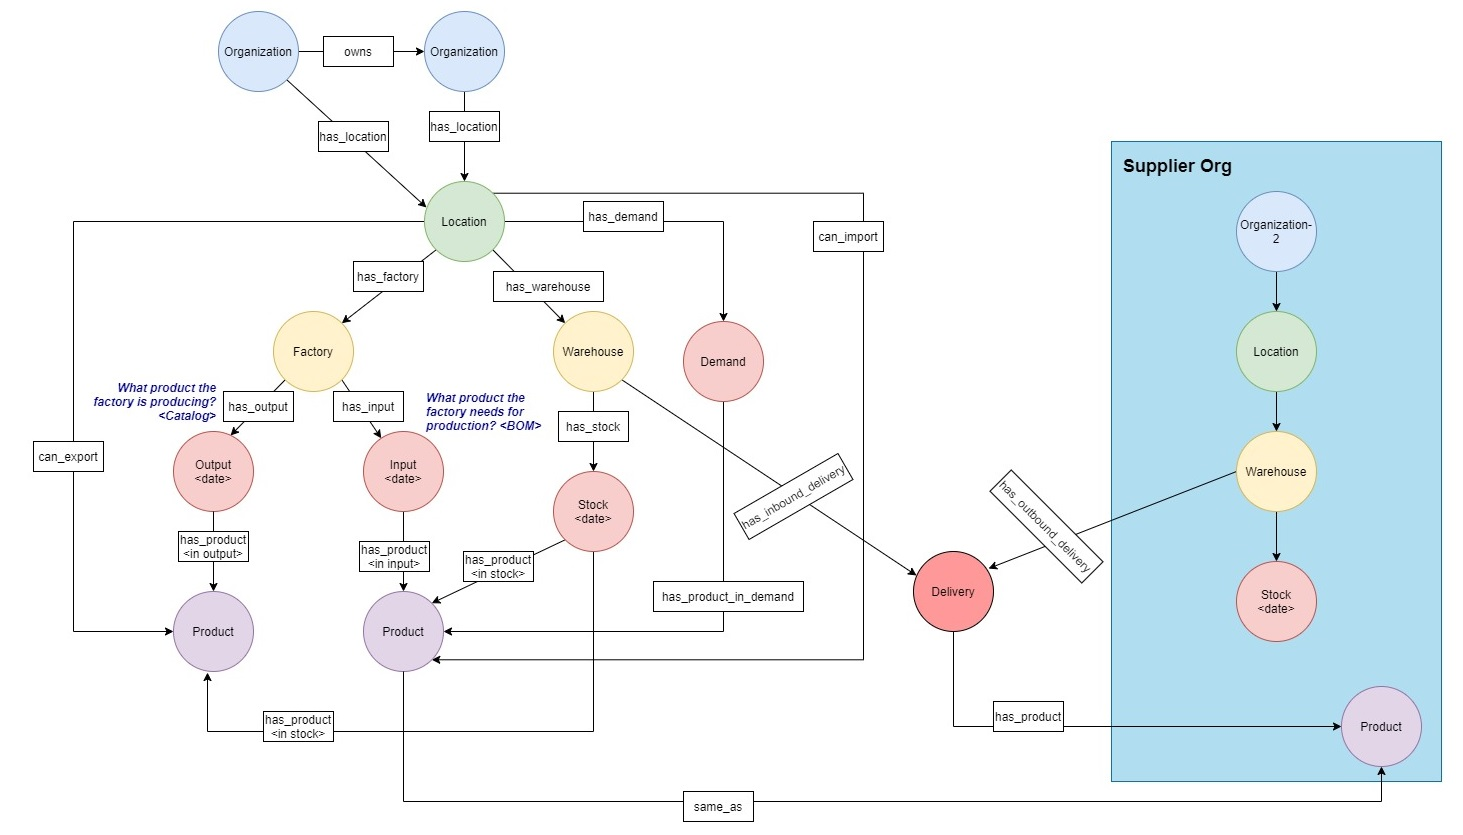

## Change the cell width for better visualization

In [28]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

---

## Check the status of our connection

The three cells below can be used to check the version of the workbench, the current configuration, and the status of the Neptune cluster.

In [29]:
%graph_notebook_version

3.7.3


In [30]:
%graph_notebook_config

{
  "host": "neptunedbcluster-tyeddjneu5au.cluster-cjisiphmbggu.us-east-1.neptune.amazonaws.com",
  "port": 8182,
  "proxy_host": "",
  "proxy_port": 8182,
  "auth_mode": "DEFAULT",
  "load_from_s3_arn": "arn:aws:iam::081672033313:role/DemoNeptuneStack-NeptuneStac-NeptuneLoadFromS3Role-SJ8O3F15LCXL",
  "ssl": true,
  "ssl_verify": true,
  "aws_region": "us-east-1",
  "sparql": {
    "path": "sparql"
  },
  "gremlin": {
    "traversal_source": "g",
    "username": "",
    "password": "",
    "message_serializer": "graphsonv3"
  },
  "neo4j": {
    "username": "neo4j",
    "password": "password",
    "auth": true,
    "database": null
  }
}


In [31]:
%status

{'status': 'healthy',
 'startTime': 'Mon Apr 17 04:04:10 UTC 2023',
 'dbEngineVersion': '1.2.0.2.R2',
 'role': 'writer',
 'dfeQueryEngine': 'viaQueryHint',
 'gremlin': {'version': 'tinkerpop-3.5.2'},
 'sparql': {'version': 'sparql-1.1'},
 'opencypher': {'version': 'Neptune-9.0.20190305-1.0'},
 'labMode': {'ObjectIndex': 'disabled',
  'ReadWriteConflictDetection': 'enabled'},
 'features': {'ResultCache': {'status': 'disabled'},
  'IAMAuthentication': 'disabled',
  'Streams': 'disabled',
  'AuditLog': 'disabled'},
 'settings': {'clusterQueryTimeoutInMs': '20000'}}

---

## Delete all data in the database

Below cell when run, deletes all data in the database. Use this cell with **CAUTION**

In [32]:
%%gremlin

g.V().drop().iterate()

---

## Create the graph

This section creates the Supply Chain data. In subsequest cells this creates:
+ Companies, suppliers, subsidiaries
+ Add locations, warehouses, factories, products, stocks

In [33]:
%%gremlin
// create locations, suppliers, subsidiaries
g.addV('company').
  property(id, 'company-1').
  property('name', 'TestCo-1').
  addV('company').
  property(id, 'company-2').
  property('name', 'TestCo-2').
  addV('company').
  property(id, 'company-3').
  property('name', 'TestCo-3').
  addV('company').
  property(id, 'company-4').
  property('name', 'TestCo-4').
  addV('company').
  property(id, 'company-5').
  property('name', 'TestCo-5').
  addV('company').
  property(id, 'company-6').
  property('name', 'TestCo-6').
  addV('company').
  property(id, 'company-7').
  property('name', 'TestCo-7').
  next()

In [34]:
%%gremlin

//add locations, warehouses, factories, products, stocks

g
    // locations
    .addV('location').property(id, 'company-2-location-1').property('name', 'Facility-1')
    .addV('location').property(id, 'company-2-location-2').property('name', 'Facility-2')
    .addV('location').property(id, 'company-5-location-1').property('name', 'Facility-3')
    .addV('location').property(id, 'company-5-location-2').property('name', 'Facility-4')
    .addV('location').property(id, 'company-6-location-1').property('name', 'Facility-5')
    .addV('location').property(id, 'company-7-location-1').property('name', 'Facility-6')

    // warehouses
    .addV('warehouse').property(id, 'company-2-location-1-warehouse').property('name', 'Warehouse-1')
    .addV('warehouse').property(id, 'company-2-location-2-warehouse').property('name', 'Warehouse-2')
    .addV('warehouse').property(id, 'company-5-location-1-warehouse').property('name', 'Warehouse-3')
    .addV('warehouse').property(id, 'company-5-location-2-warehouse').property('name', 'Warehouse-4')
    .addV('warehouse').property(id, 'company-6-location-1-warehouse').property('name', 'Warehouse-5')
    .addV('warehouse').property(id, 'company-7-location-1-warehouse').property('name', 'Warehouse-6')

    // factories
    .addV('factory').property(id, 'company-2-location-1-factory').property('name', 'Factory-1')
    .addV('factory').property(id, 'company-2-location-2-factory').property('name', 'Factory-2')
    .addV('factory').property(id, 'company-5-location-1-factory').property('name', 'Factory-3')
    .addV('factory').property(id, 'company-5-location-2-factory').property('name', 'Factory-4')
    .addV('factory').property(id, 'company-6-location-1-factory').property('name', 'Factory-5')
    .addV('factory').property(id, 'company-7-location-1-factory').property('name', 'Factory-6')

    // products
    .addV('product').property(id, 'company-2-product-1').property('name', 'Sedan Car')
    .addV('product').property(id, 'company-2-product-2').property('name', 'SUV Car')
    .addV('product').property(id, 'company-5-product-1').property('name', 'Front Seat')
    .addV('product').property(id, 'company-5-product-2').property('name', 'Rear Seat')
    .addV('product').property(id, 'company-5-product-3').property('name', 'Bench Seat')
    .addV('product').property(id, 'company-6-product-1').property('name', 'Springs')
    .addV('product').property(id, 'company-6-product-2').property('name', 'Heating')
    .addV('product').property(id, 'company-7-product-1').property('name', 'Steel')

    // stocks
    .addV('stock').property(id, 'company-2-location-1-warehouse-stock-1').property('date', datetime('2022-08-01'))
    .addV('stock').property(id, 'company-2-location-1-warehouse-stock-2').property('date', datetime('2022-08-02'))
    .addV('stock').property(id, 'company-7-location-1-warehouse-stock-1').property('date', datetime('2022-08-01'))
    .addV('stock').property(id, 'company-7-location-1-warehouse-stock-2').property('date', datetime('2022-08-02'))
    .next()

### Sample data verification

+ Check the number of companies (should be 7)
+ Check the total number of products (should be 8)

In [35]:
%%gremlin

// check number of companies
g.V().hasLabel('company').count()

In [36]:
%%gremlin

// check the total number of products
g.V().hasLabel('product').count()

---

## Start creating the relationships between the nodes

In the following section, we will start creating the relationships among different nodes to create the demo supply chain for the autmotive company

### Company ownership structure

We want to add the company ownership structure. To do that, we need to create an **edge** and we need to connect a company with its subsidiaries. Here we add edge of type **owns** which connects the companies as per the ownership structure. This essentially mentions a company **owns** another query.

In [37]:
%%gremlin

g.addE('owns').from(__.V('company-1')).to(__.V('company-2')).
  addE('owns').from(__.V('company-1')).to(__.V('company-3')).
  addE('owns').from(__.V('company-4')).to(__.V('company-5')).
  next()

### Visualize the company ownership structure

Let's visualize the relationship of the company like a graph. Here we will check every edge that are being pointed out and every vertex that are being pointed into. This is what we see in the company: Company **TestCo-1** owns couple of subsidiaries and also **TestCo-4** owns another company.

In [38]:
%%gremlin -p v,oute,inv

g.V().outE().inV().path().by('name').by(label())

## Create the relationships between factories, warehouses, products, stocks

In this section, we will now create the relationship between on the facility locations for the companies, mapping to the warehouses and factories, mapping to the products in them and what are the stocks available?

In [39]:
%%gremlin

g.addE('has_location').
    from(__.V('company-2')).
    to(__.V('company-2-location-1')).
  addE('has_location').
    from(__.V('company-2')).
    to(__.V('company-2-location-2')).
  addE('has_location').
    from(__.V('company-5')).
    to(__.V('company-5-location-1')).
  addE('has_location').
    from(__.V('company-5')).
    to(__.V('company-5-location-2')).
  addE('has_location').
    from(__.V('company-6')).
    to(__.V('company-6-location-1')).
  addE('has_location').
    from(__.V('company-7')).
    to(__.V('company-7-location-1')).
  addE('has_warehouse').
    from(__.V('company-2-location-1')).
    to(__.V('company-2-location-1-warehouse')).
  addE('has_warehouse').
    from(__.V('company-2-location-2')).
    to(__.V('company-2-location-2-warehouse')).
  addE('has_warehouse').
    from(__.V('company-5-location-1')).
    to(__.V('company-5-location-1-warehouse')).
  addE('has_warehouse').
    from(__.V('company-5-location-2')).
    to(__.V('company-5-location-2-warehouse')).
  addE('has_warehouse').
    from(__.V('company-6-location-1')).
    to(__.V('company-6-location-1-warehouse')).
  addE('has_warehouse').
    from(__.V('company-7-location-1')).
    to(__.V('company-7-location-1-warehouse')).
  addE('has_factory').
    from(__.V('company-2-location-1')).
    to(__.V('company-2-location-1-factory')).
  addE('has_factory').
    from(__.V('company-2-location-2')).
    to(__.V('company-2-location-2-factory')).
  addE('has_factory').
    from(__.V('company-5-location-1')).
    to(__.V('company-5-location-1-factory')).
  addE('has_factory').
    from(__.V('company-5-location-2')).
    to(__.V('company-5-location-2-factory')).
  addE('has_factory').
    from(__.V('company-6-location-1')).
    to(__.V('company-6-location-1-factory')).
  addE('has_factory').
    from(__.V('company-7-location-1')).
    to(__.V('company-7-location-1-factory')).
  addE('has_in_catalog').
    from(__.V('company-2')).
    to(__.V('company-2-product-1')).
  addE('has_in_catalog').
    from(__.V('company-2')).
    to(__.V('company-2-product-2')).
  addE('has_in_catalog').
    from(__.V('company-5')).
    to(__.V('company-5-product-1')).
  addE('has_in_catalog').
    from(__.V('company-5')).
    to(__.V('company-5-product-2')).
  addE('has_in_catalog').
    from(__.V('company-5')).
    to(__.V('company-5-product-3')).
  addE('has_in_catalog').
    from(__.V('company-6')).
    to(__.V('company-6-product-1')).
  addE('has_in_catalog').
    from(__.V('company-6')).
    to(__.V('company-6-product-2')).
  addE('has_in_catalog').
    from(__.V('company-7')).
    to(__.V('company-7-product-1')).
  addE('made_of').
    from(__.V('company-2-product-1')).
    to(__.V('company-5-product-1')).
  property('unit', 'PC').
  property('qty', 2).
  addE('made_of').
    from(__.V('company-2-product-2')).
    to(__.V('company-5-product-1')).
  property('unit', 'PC').
  property('qty', 2).
  addE('made_of').
    from(__.V('company-2-product-1')).
    to(__.V('company-7-product-1')).
  property('unit', 'KG').
  property('qty', 123.45).
  addE('made_of').
    from(__.V('company-2-product-2')).
    to(__.V('company-5-product-1')).
  property('unit', 'KG').
  property('qty', 123.45).
  addE('made_of').
    from(__.V('company-2-product-1')).
    to(__.V('company-5-product-2')).
  property('unit', 'PC').
  property('qty', 3).
  addE('made_of').
    from(__.V('company-2-product-2')).
    to(__.V('company-5-product-2')).
  property('unit', 'PC').
  property('qty', 3).
  addE('made_of').
    from(__.V('company-2-product-2')).
    to(__.V('company-5-product-3')).
  property('unit', 'PC').
  property('qty', 2).
  addE('made_of').
    from(__.V('company-5-product-1')).
    to(__.V('company-6-product-1')).
  property('unit', 'PC').
  property('qty', 1).
  addE('made_of').
    from(__.V('company-5-product-2')).
    to(__.V('company-6-product-1')).
  property('unit', 'PC').
  property('qty', 1).
  addE('made_of').
    from(__.V('company-5-product-3')).
    to(__.V('company-6-product-1')).
  property('unit', 'PC').
  property('qty', 1).
  addE('made_of').
    from(__.V('company-5-product-1')).
    to(__.V('company-6-product-2')).
  property('unit', 'PC').
  property('qty', 1).
  addE('made_of').
    from(__.V('company-5-product-2')).
    to(__.V('company-6-product-2')).
  property('unit', 'PC').
  property('qty', 1).
  addE('made_of').
    from(__.V('company-5-product-3')).
    to(__.V('company-6-product-2')).
  property('unit', 'PC').
  property('qty', 1).
  addE('made_of').
    from(__.V('company-6-product-1')).
    to(__.V('company-7-product-1')).
  property('unit', 'KG').
  property('qty', 0.12).
  addE('made_of').
    from(__.V('company-6-product-2')).
    to(__.V('company-7-product-1')).
  property('unit', 'KG').
  property('qty', 3.4).
  addE('has_stock').
    from(__.V('company-2-location-1-warehouse')).
    to(__.V('company-2-location-1-warehouse-stock-1')).
  property('date', datetime('2022-08-01')).
  addE('has_stock').
    from(__.V('company-2-location-1-warehouse')).
    to(__.V('company-2-location-1-warehouse-stock-2')).
  property('date', datetime('2022-08-02')).
  addE('has_stock').
    from(__.V('company-7-location-1-warehouse')).
    to(__.V('company-7-location-1-warehouse-stock-1')).
  property('date', datetime('2022-08-01')).
  addE('has_stock').
    from(__.V('company-7-location-1-warehouse')).
    to(__.V('company-7-location-1-warehouse-stock-2')).
  property('date', datetime('2022-08-02')).
  addE('has_product_in_stock').
    from(__.V('company-2-location-1-warehouse-stock-1')).
    to(__.V('company-2-product-1')).
  property('unit', 'PC').
  property('qty', 10).
  property('date', datetime('2022-08-01')).
  addE('has_product_in_stock').
    from(__.V('company-2-location-1-warehouse-stock-1')).
    to(__.V('company-2-product-2')).
  property('unit', 'PC').
  property('qty', 4).
  property('date', datetime('2022-08-01')).
  addE('has_product_in_stock').
    from(__.V('company-2-location-1-warehouse-stock-2')).
    to(__.V('company-2-product-1')).
  property('unit', 'PC').
  property('qty', 2).
  property('date', datetime('2022-08-02')).
  addE('has_product_in_stock').
    from(__.V('company-2-location-1-warehouse-stock-2')).
    to(__.V('company-2-product-2')).
  property('unit', 'PC').
  property('qty', 0).
  property('date', datetime('2022-08-02')).
  addE('has_product_in_stock').
    from(__.V('company-7-location-1-warehouse-stock-1')).
    to(__.V('company-7-product-1')).
  property('unit', 'KG').
  property('qty', 123.45).
  property('date', datetime('2022-08-01')).
  addE('has_product_in_stock').
    from(__.V('company-7-location-1-warehouse-stock-2')).
    to(__.V('company-7-product-1')).
  property('unit', 'KG').
  property('qty', 0).
  property('date', datetime('2022-08-02'))

## Visualize the overall graph

Let's now visualize the overall graph and the various connectivities between the actors taking part in this Supply Chain. So here we get the connectivity between:
+ A company (for example company TestCo-6) has locations of the facility and that location has warehouse and factory
+ We have also built a catalog of products connecting to the company. These products are made of other products which in turn are catalog of other companies

So, we have built a simple Supply Chain for the organizations and they are using the products together

In [40]:
%%gremlin -p v,oute,inv

g.V().outE().inV().path().by(elementMap())

## Traverse the graph for key KPIs

The next part is to traverse the graph of this sample supply chain and starting to get the actionable key KPIs.

### Get a Bill of Material (BoM)

**Bill of Material** is essentially how a product is made, essentially a recipe for that product. So for example, in order to get the **BoM** for a car, below is the query which needs to be executed over the sample data. In this example, we are looking into the **BoM** for a Sedan Car, what that car is made like seats and steel showing the corresponding quantity available. Therefore, this query essentially traverses the graph to get the details for a certain product.

In [41]:
%%gremlin -p v,oute,inv,oute,inv,oute,inv,oute,inv

// get BoM

g.V().
  has('name', 'Sedan Car').as('product').
  outE('made_of').
  inV().as('material').
  path().by('name').by('qty')

### What the various components are made of?

In the second part of analysis for this BoM, we want to know that what the front seat is made of and subsequently what is that material is made of. Which means, we want to see the linkages in this supply chain for a certain a product at "N"th depth, which is super useful for analysis and take actions. Hence, in this case Amazon Neptune adds the value in this use case where the Nth level of information can be queried and analyze the shortages for example which can impact the production.

In this query, what we get details, for example that for the **Sedan Car**, the **Rear Seat** is made **Springs** and **Heating** component. The graph also shows that what **Springs** are made of which is **Steel**, and this way you can query on till the Nth level details.

In [42]:
%%gremlin -p v,oute,inv,oute,inv,oute,inv

// get the entire N tier supply

g.V().
  has('name', 'Sedan Car').as('product').
  outE('made_of').
  inV().as('material').
  optional(repeat(outE('made_of').inV().as('material')).times(2).emit()).
  path().by('name').by('qty')

Another key point is to understand that what is the **BoM** at what tier, which also can be queried in this graph. Below is the query for this. Here **times(2)** has been added over the above query, which essentially repeats the query twice. Note, we can change the value to any number to get that level of details. Therefore, through this example, you can answer the questions from your customer that **who are my N level supplier?**

### Stocks for a certain type of car

Now, let's ask the graph a question like **what are the stocks that I have for a certain type of car in all the warehouses?**. Quering the graph, we can see that all my warehouses have total 10 Sedan Cars.

In [43]:
%%gremlin -p v,ine,outv

// get company's stock for a date
g.V().has('name', 'Sedan Car').as('product')
    .inE('has_product_in_stock').has('date', datetime('2022-08-01')).outV().as('stock')
    .path().by('name').by('qty').by('date')

In the next step, as an automotive organizaion, we want to know all my the stock that our subsidiaries have. Below query, traverses the graph for TestCo-1 to get the details of the stocks including the subsidiaries for a certain date (2022-08-01).

In [44]:
%%gremlin -p v,oute,inv,oute,inv,oute,inv,oute,inv,oute,inv

// get the stock from all the subsidiaries for a given date
g.V().
  has('name', 'TestCo-1').
  outE('owns').
  inV().as('subsidiary').
  optional(
    outE('has_location').
    inV().as('location').
    outE('has_warehouse').
    inV().as('warehouse').
    optional(
      outE('has_stock').
      has('date', datetime('2022-08-01')).
      inV().as('stock').
      outE('has_product_in_stock').
      inV().as('product'))).
  path().by(elementMap())

Another crucial use case is to know whether or not TestCo-1 have enough stock, but want to analyze if all the materials required to build the product are in stock at a certain date and how much is that stock?

In [45]:
%%gremlin

// get all the stock in the supply chain for a product and its components

g.V().
  has('name', 'Sedan Car').as('product').
  inE('has_product_in_stock').
  has('date', datetime('2022-08-01')).
  outV().as('stock').
  select('product').
  outE('made_of').
  inV().as('material').
  optional(
    repeat(
      outE('made_of').
      inV().as('material').
      optional(
        inE('has_product_in_stock').
        has('date', datetime('2022-08-01')).
        outV().as('stock').
        select('material'))).
      emit()).
  path()

Final use case is, analyze the potential shortages in the supply chain, which is a very important part. Below query traverses the graph and finds out that given a product is there any component that has a shortage which can affect the production of that particular product. So the query essentially returns the data there will is a potential shortage of **Steel** on date **2022-08-02** at a certain warehouse.

In [46]:
%%gremlin

// get potential shortages of components

g.V().
  has('name', 'Sedan Car').as('product').
  repeat(
    out('made_of').as('material').
    inE('has_product_in_stock').
    has('qty', lt(1)).as('stocklevel').
    outV().
    simplePath()).
    emit().
  select('material', 'stocklevel').by(elementMap('date', 'name', 'qty')).
  unfold()